# Partitional Clustering 
A division of data objects into non-overlapping subsets 
(clusters) such that each data object is in exactly one subset

d:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


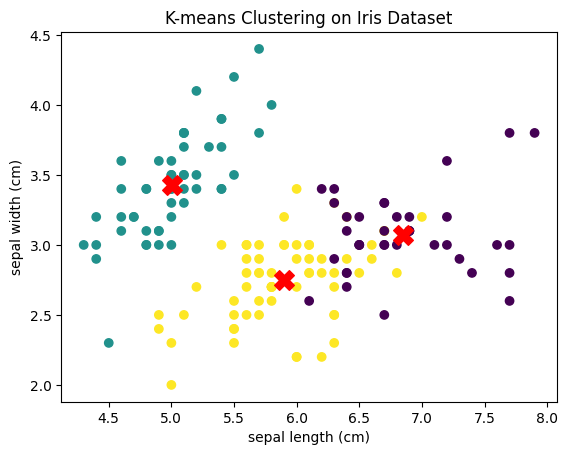

In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
data = iris.data

# Define the number of clusters (K)
k = 3

# Create a KMeans instance
kmeans = KMeans(n_clusters=k)

# Fit the model to the data
kmeans.fit(data)

# Get cluster assignments for each data point
labels = kmeans.labels_

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Plot the data points and cluster centers
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, marker='X', c='red')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("K-means Clustering on Iris Dataset")
plt.show()


# Heirarchial Clustering 
A set of nested clusters organized as a hierarchical tree 

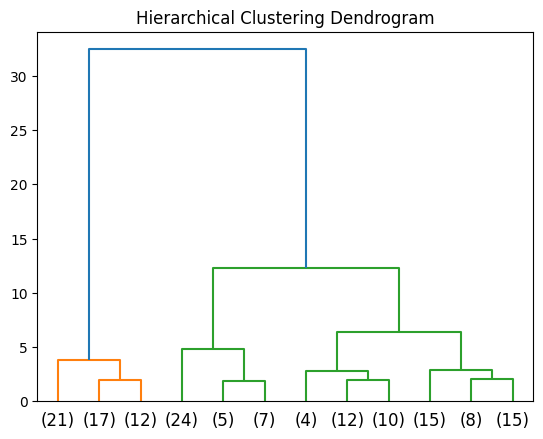

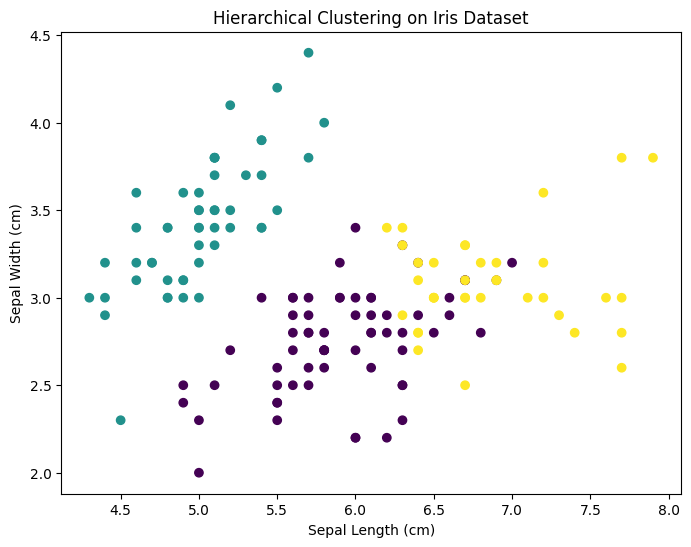

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Feature matrix
y = iris.target  # Target labels

# Create an AgglomerativeClustering instance
n_clusters = 3  # Number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)

# Fit the hierarchical clustering model to the data
agg_labels = agg_clustering.fit_predict(X)

# Plot a dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_matrix = linkage(X, 'ward')
dendrogram(linkage_matrix, truncate_mode='lastp', p=12)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

# Plot the data points with different colors for each cluster
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=agg_labels, cmap='viridis')
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Hierarchical Clustering on Iris Dataset")
plt.show()


# Well Seperated Clusters

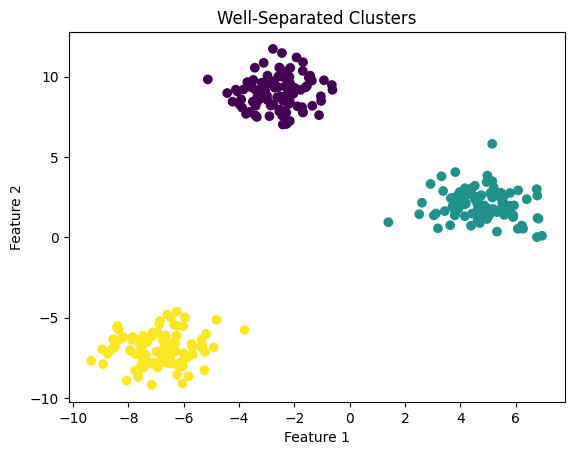

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic well-separated clusters
n_samples = 300
n_features = 2
n_clusters = 3
cluster_std = 1.0

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, cluster_std=cluster_std, random_state=42)

# Plot the synthetic data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Well-Separated Clusters")
plt.show()


# Well Seperated Clusters

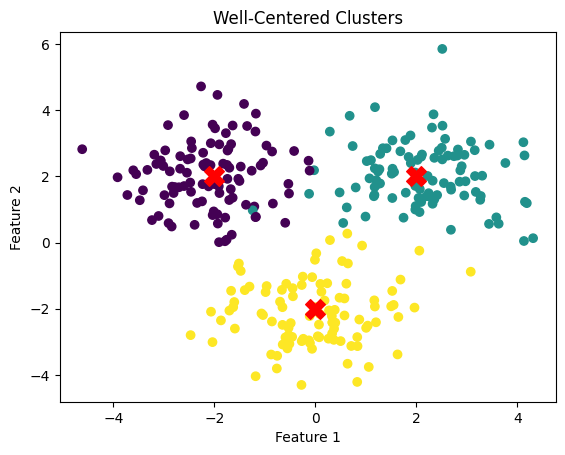

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Specify the cluster centers
cluster_centers = np.array([[-2, 2], [2, 2], [0, -2]])

# Generate synthetic data with specified cluster centers
n_samples = 300
X, y = make_blobs(n_samples=n_samples, centers=cluster_centers, random_state=42)

# Plot the synthetic data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, marker='X', c='red')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Well-Centered Clusters")
plt.show()


# Contiguity Based Clusters
https://realpython.com/k-means-clustering-python/

In [9]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

features, true_labels = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=42
)

In [10]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [11]:
true_labels[:5]

array([1, 0, 2, 2, 2])

In [12]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [13]:
scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

In [14]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [15]:
# The lowest SSE value
kmeans.inertia_
# Final locations of the centroid
kmeans.cluster_centers_
# The number of iterations required to converge
kmeans.n_iter_

10

In [16]:
kmeans.labels_[:5]

array([0, 1, 2, 2, 2])

In [17]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

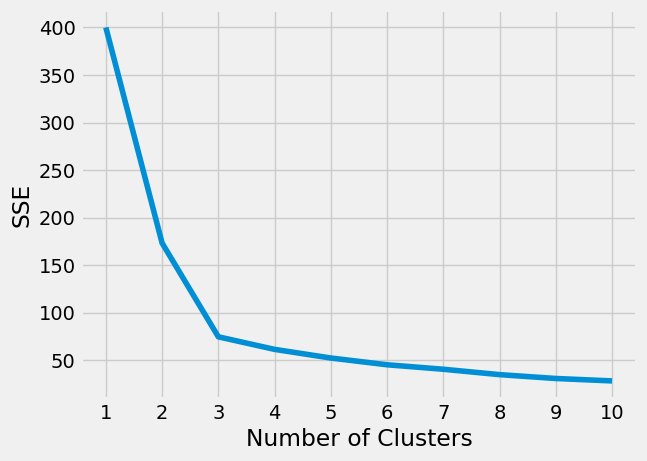

In [18]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [19]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

3

In [20]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

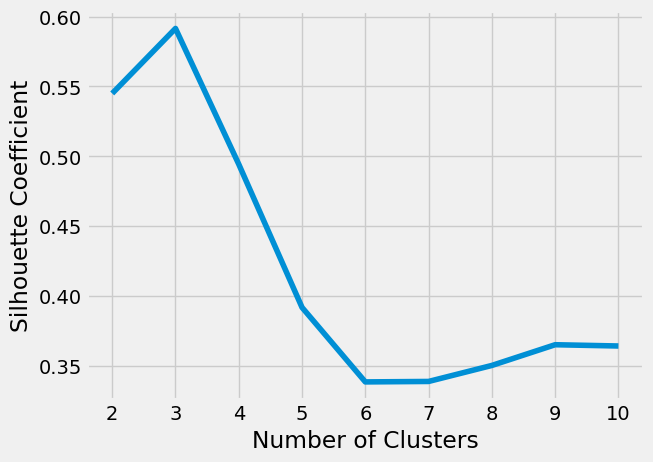

In [21]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [22]:
# Using Advanced Techs
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [23]:
features, true_labels = make_moons(
    n_samples=250, noise=0.05, random_state=42
)
scaled_features = scaler.fit_transform(features)

In [24]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(
    scaled_features, kmeans.labels_).round(2)
dbscan_silhouette = silhouette_score(
   scaled_features, dbscan.labels_).round (2)

d:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [28]:
kmeans_silhouette
dbscan_silhouette

0.38

In [26]:
ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)
ari_dbscan = adjusted_rand_score(true_labels, dbscan.labels_)

round(ari_kmeans, 2)
round(ari_dbscan, 2)

1.0

# Density Based Clusters

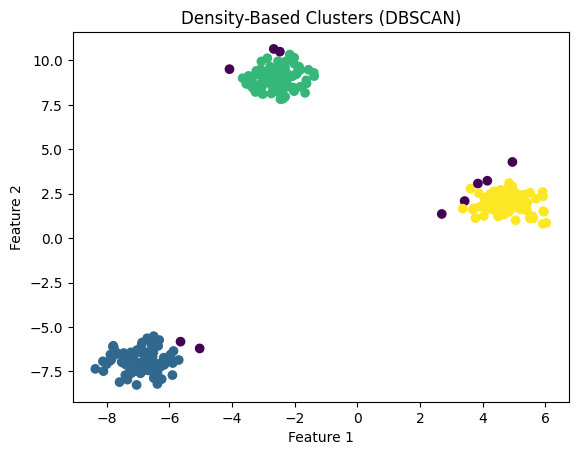

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

# Generate synthetic data with density-based clusters
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=42)

# Create a DBSCAN instance
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the DBSCAN model to the data
dbscan.fit(X)

# Get cluster labels (-1 indicates noise)
labels = dbscan.labels_

# Plot the data points with different colors for each cluster
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Density-Based Clusters (DBSCAN)")
plt.show()


# Conceptual Clusters

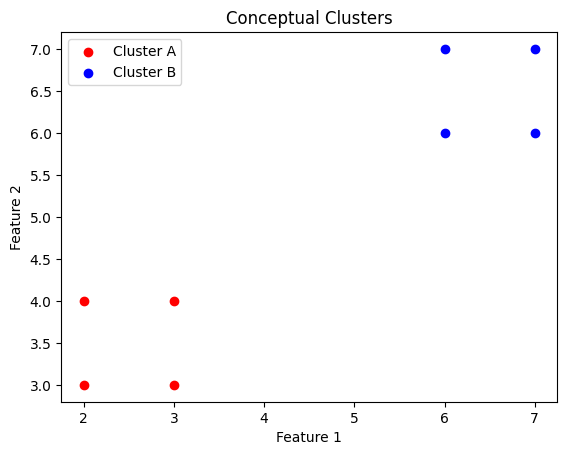

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data with conceptual clusters
data = np.array([
    [2, 3],
    [2, 4],
    [3, 3],
    [3, 4],
    [6, 6],
    [6, 7],
    [7, 6],
    [7, 7]
])

# Create conceptual clusters based on feature similarity
clusters = {
    "Cluster A": [0, 1, 2, 3],
    "Cluster B": [4, 5, 6, 7]
}

# Plot the data points with different colors for each conceptual cluster
colors = ['red', 'blue']
for label, indices in clusters.items():
    cluster_data = data[indices]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors.pop(0), label=label)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Conceptual Clusters")
plt.legend()
plt.show()
